# Business Understanding

## Latar Belakang

Kartu kredit merupakan salah satu produk keuangan yang banyak digunakan oleh masyarakat. Untuk meminimalisir risiko gagal bayar, industri keuangan menggunakan credit score card sebagai metode pengendalian risiko. Credit score card memanfaatkan data dan informasi pribadi yang diajukan oleh calon pemegang kartu kredit untuk memprediksi kemungkinan terjadinya gagal bayar di masa depan. Dengan demikian, bank dapat mengambil keputusan apakah akan menerbitkan kartu kredit kepada pemohon atau tidak. Skor kredit ini mampu mengkuantifikasi tingkat risiko secara objektif.

## Tujuan Bisnis

Tujuan dari proyek ini adalah membangun model machine learning yang dapat memprediksi apakah seorang pemohon kartu kredit termasuk kategori 'good' atau 'bad' client. Berbeda dengan tugas-tugas lain, definisi 'good' atau 'bad' client tidak diberikan secara eksplisit, sehingga perlu dilakukan konstruksi label menggunakan teknik tertentu seperti vintage analysis. Selain itu, masalah data yang tidak seimbang (unbalanced data) juga menjadi tantangan utama dalam tugas ini.

## Dampak Bisnis
Dengan adanya model prediksi yang akurat dan transparan, bank dapat:
- Mengurangi risiko gagal bayar.
- Mengoptimalkan proses pemberian kredit.
- Memberikan alasan yang jelas kepada nasabah dan regulator terkait keputusan kredit.
- Meningkatkan kepercayaan dan kepuasan nasabah.


## Project Domain

Proyek ini berada dalam domain keuangan, khususnya pada pengelolaan risiko kredit. Fokusnya adalah pada pengembangan model prediksi untuk credit scoring, yang digunakan oleh lembaga keuangan untuk menilai kelayakan kredit calon nasabah. Dengan memanfaatkan data historis dan algoritma machine learning, proyek ini bertujuan untuk meningkatkan akurasi prediksi risiko gagal bayar, sekaligus memastikan transparansi dalam pengambilan keputusan kredit.

## Problem Statements

Umumnya, credit score card dibangun berdasarkan data historis. Namun, ketika terjadi fluktuasi ekonomi yang besar, model yang dibangun dari data masa lalu bisa kehilangan kemampuan prediksinya. Model logistik (logistic regression) sering digunakan untuk credit scoring karena cocok untuk tugas klasifikasi biner dan dapat menghitung koefisien dari setiap fitur. Namun, seiring perkembangan teknologi, algoritma machine learning seperti Boosting, Random Forest, dan Support Vector Machines mulai digunakan untuk meningkatkan akurasi prediksi. Meskipun demikian, metode-metode ini sering kali kurang transparan dan sulit memberikan alasan penolakan atau penerimaan kepada nasabah maupun regulator.

## Goals

1. Membangun model machine learning yang dapat memprediksi apakah seorang pemohon kartu kredit termasuk kategori 'good' atau 'bad' client.
2. Mengatasi tantangan data yang tidak seimbang (unbalanced data) untuk memastikan model memiliki performa yang baik pada kedua kategori.
3. Memastikan model yang dibangun memiliki tingkat akurasi yang tinggi sekaligus transparan dalam pengambilan keputusan.
4. Memberikan insight yang dapat digunakan oleh bank untuk mengurangi risiko gagal bayar dan meningkatkan efisiensi proses pemberian kredit.

## Solution Statements

1. Mengumpulkan dan memahami data historis yang relevan untuk membangun model prediksi credit scoring.
2. Melakukan eksplorasi data untuk mengidentifikasi pola, outlier, dan distribusi data, serta menangani data yang tidak seimbang (unbalanced data).
3. Menggunakan algoritma machine learning seperti Logistic Regression, Random Forest, dan Boosting untuk membangun model prediksi.
4. Melakukan evaluasi model menggunakan metrik yang sesuai seperti akurasi, precision, recall, dan F1-score untuk memastikan performa model.
5. Memastikan transparansi model dengan menggunakan teknik interpretasi model seperti SHAP (SHapley Additive exPlanations) atau LIME (Local Interpretable Model-agnostic Explanations).
6. Memberikan rekomendasi berbasis data kepada bank untuk mengurangi risiko gagal bayar dan meningkatkan efisiensi proses pemberian kredit.

# Data Understanding

Pada tahap ini, kita akan memahami struktur data yang akan digunakan untuk membangun model prediksi. Langkah-langkah yang akan dilakukan meliputi:
1. Melihat sekilas data (head, info, dan deskripsi statistik).
2. Memeriksa distribusi data dan nilai yang hilang.
3. Mengidentifikasi fitur-fitur yang relevan untuk analisis lebih lanjut.

## Import data dari kaggle

In [ ]:
import os
import json
from google.colab import files

if not os.path.exists('/root/.kaggle/kaggle.json'):
  print("kaggle.json not found. Please upload the file:")
  uploaded = files.upload()

  # Ensure the directory exists
  os.makedirs('/root/.kaggle', exist_ok=True)

  # Save the uploaded file
  with open('/root/.kaggle/kaggle.json', 'wb') as f:
    f.write(uploaded['kaggle.json'])

  # Set permissions for the file
  os.chmod('/root/.kaggle/kaggle.json', 600)

  print("kaggle.json uploaded and configured successfully.")

else:
  print("kaggle.json already exists.")

Saving kaggle.json to kaggle (3).json


{'kaggle (3).json': b'{"username":"danielrizaldy","key":"d7299a4ae2424cfc9b491daa453894b2"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [ ]:
!kaggle datasets download -d rikdifos/credit-card-approval-prediction --force

Dataset URL: https://www.kaggle.com/datasets/rikdifos/credit-card-approval-prediction
License(s): CC0-1.0
  0% 0.00/5.32M [00:00<?, ?B/s]
100% 5.32M/5.32M [00:00<00:00, 110MB/s]


In [ ]:
!mkdir credit-card-approval-prediction
!unzip credit-card-approval-prediction.zip -d credit-card-approval-prediction
!ls credit-card-approval-prediction

mkdir: cannot create directory ‘credit-card-approval-prediction’: File exists
Archive:  credit-card-approval-prediction.zip
replace credit-card-approval-prediction/application_record.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: credit-card-approval-prediction/application_record.csv  
  inflating: credit-card-approval-prediction/credit_record.csv  
application_record.csv	credit_record.csv


## Import Library yang dibutuhkan

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
import pandas as pd

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# Load the data
# Assuming you have the CSV files in the current directory
app_df = pd.read_csv('credit-card-approval-prediction/application_record.csv')
credit_df = pd.read_csv('credit-card-approval-prediction/credit_record.csv')

## Exploratory Data Analysis

In [ ]:
# app_df Exploration
print("app_df Information:")
display(app_df.info())
print("\napp_df Missing Values:")
display(app_df.isnull().sum())
print("\napp_df Shape:", app_df.shape)
print("\napp_df Descriptive Statistics:")
display(app_df.describe(include='all'))

app_df Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 1

None


app_df Missing Values:


,0
ID,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
NAME_INCOME_TYPE,0
NAME_EDUCATION_TYPE,0
NAME_FAMILY_STATUS,0
NAME_HOUSING_TYPE,0



app_df Shape: (438557, 18)

app_df Descriptive Statistics:


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
count,4.385570e+05,438557,438557,438557,438557.000000,4.385570e+05,438557,438557,438557,438557,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,304354,438557.000000
unique,NaN,2,2,2,NaN,NaN,5,5,5,6,NaN,NaN,NaN,NaN,NaN,NaN,18,NaN
top,NaN,F,N,Y,NaN,NaN,Working,Secondary / secondary special,Married,House / apartment,NaN,NaN,NaN,NaN,NaN,NaN,Laborers,NaN
freq,NaN,294440,275459,304074,NaN,NaN,226104,301821,299828,393831,NaN,NaN,NaN,NaN,NaN,NaN,78240,NaN
mean,6.022176e+06,NaN,NaN,NaN,0.427390,1.875243e+05,NaN,NaN,NaN,NaN,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,NaN,2.194465
std,5.716370e+05,NaN,NaN,NaN,0.724882,1.100869e+05,NaN,NaN,NaN,NaN,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,NaN,0.897207
min,5.008804e+06,NaN,NaN,NaN,0.000000,2.610000e+04,NaN,NaN,NaN,NaN,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,NaN,1.000000
25%,5.609375e+06,NaN,NaN,NaN,0.000000,1.215000e+05,NaN,NaN,NaN,NaN,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,NaN,2.000000
50%,6.047745e+06,NaN,NaN,NaN,0.000000,1.607805e+05,NaN,NaN,NaN,NaN,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,NaN,2.000000
75%,6.456971e+06,NaN,NaN,NaN,1.000000,2.250000e+05,NaN,NaN,NaN,NaN,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,NaN,3.000000



Distribution of Age:


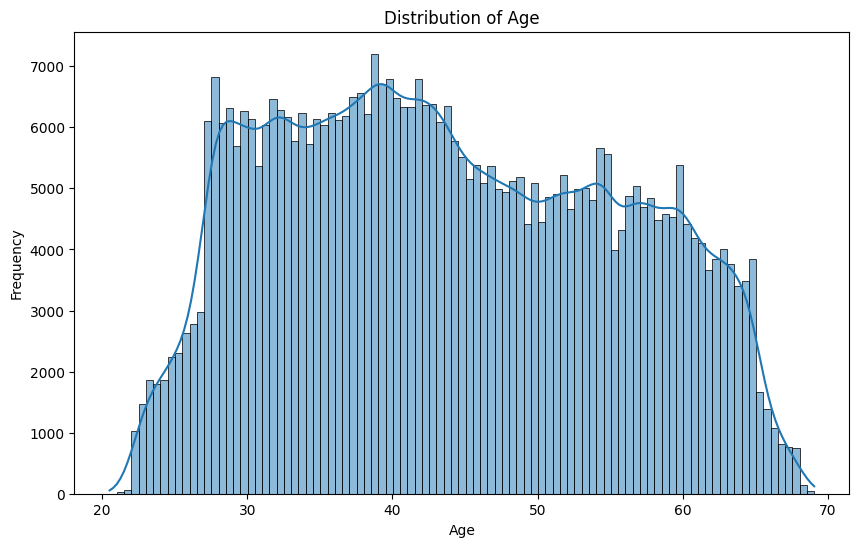

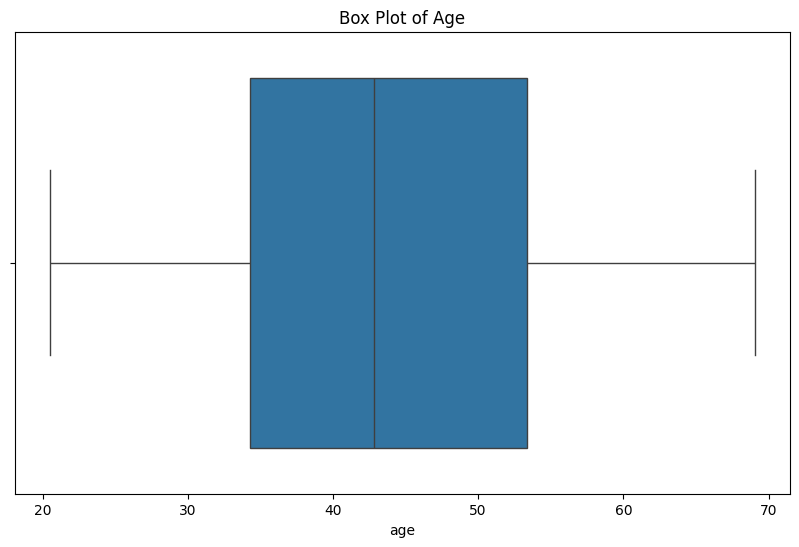

In [ ]:
# Analyze key features
print("\nDistribution of Age:")
app_df['age'] = abs(app_df['DAYS_BIRTH']) / 365
plt.figure(figsize=(10, 6))
sns.histplot(app_df['age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=app_df['age'])
plt.title('Box Plot of Age')
plt.show()


Analysis of AMT_INCOME_TOTAL:


,AMT_INCOME_TOTAL
count,4.385570e+05
mean,1.875243e+05
std,1.100869e+05
min,2.610000e+04
25%,1.215000e+05
50%,1.607805e+05
75%,2.250000e+05
max,6.750000e+06


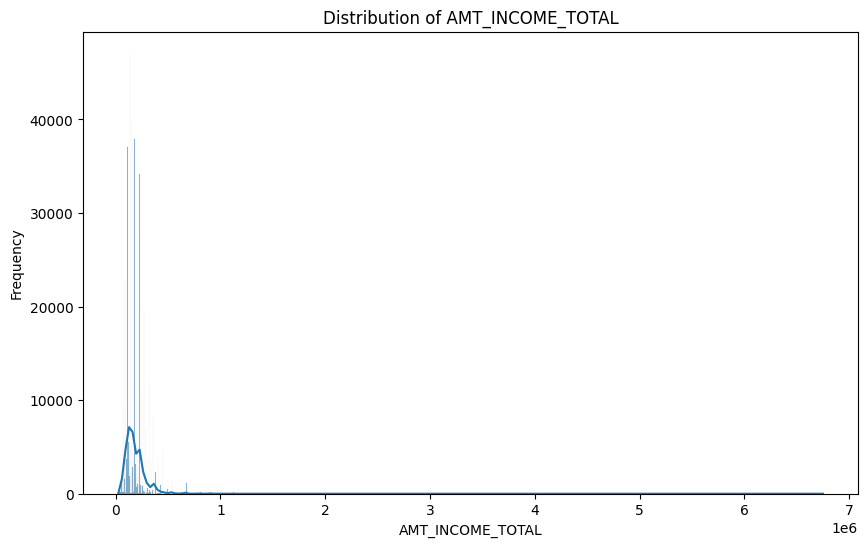

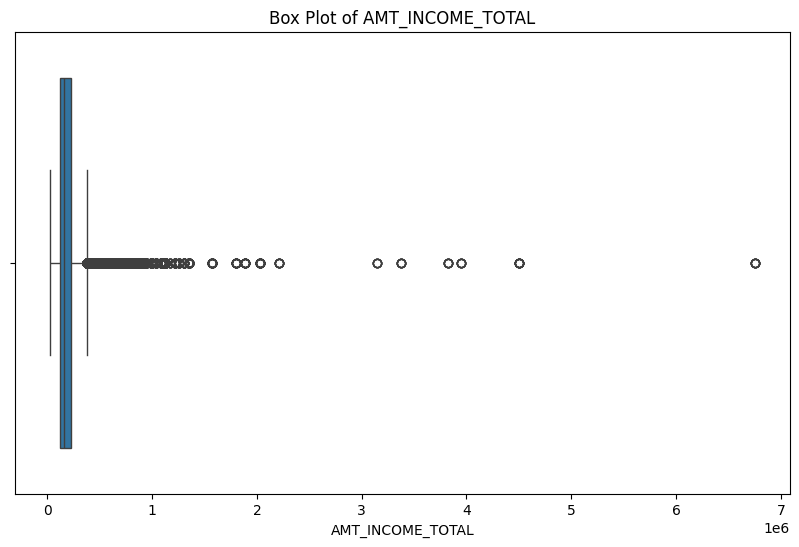

In [ ]:
# Analysis of AMT_INCOME_TOTAL
print("\nAnalysis of AMT_INCOME_TOTAL:")
display(app_df['AMT_INCOME_TOTAL'].describe())

plt.figure(figsize=(10, 6))
sns.histplot(app_df['AMT_INCOME_TOTAL'], kde=True)
plt.title('Distribution of AMT_INCOME_TOTAL')
plt.xlabel('AMT_INCOME_TOTAL')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=app_df['AMT_INCOME_TOTAL'])
plt.title('Box Plot of AMT_INCOME_TOTAL')
plt.show()


Analysis of NAME_INCOME_TYPE:


,count
NAME_INCOME_TYPE,
Working,226104
Commercial associate,100757
Pensioner,75493
State servant,36186
Student,17


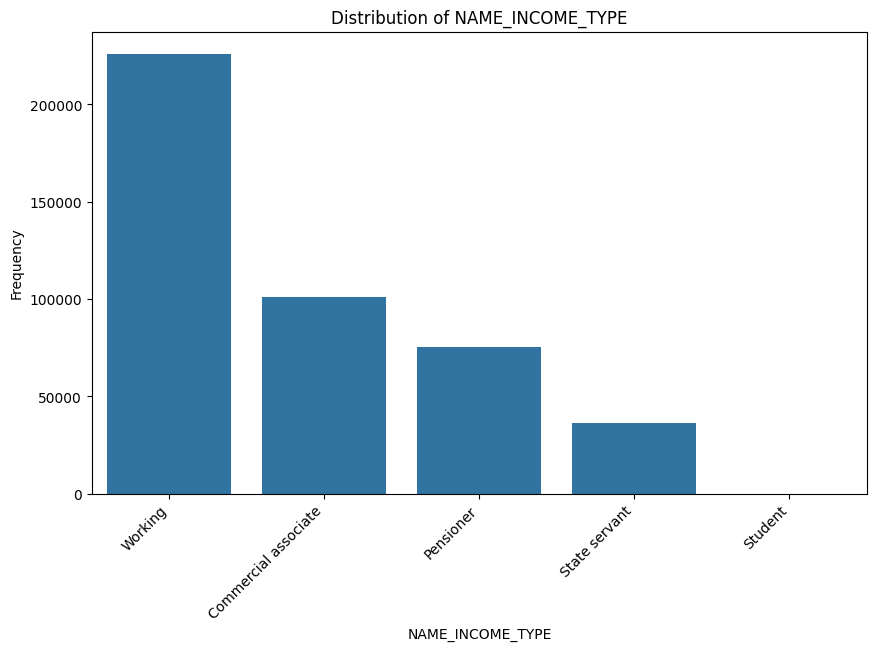

In [ ]:
# Analysis of NAME_INCOME_TYPE
print("\nAnalysis of NAME_INCOME_TYPE:")
display(app_df['NAME_INCOME_TYPE'].value_counts())

plt.figure(figsize=(10, 6))
sns.countplot(x='NAME_INCOME_TYPE', data=app_df)
plt.title('Distribution of NAME_INCOME_TYPE')
plt.xlabel('NAME_INCOME_TYPE')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


credit_df Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


None


credit_df Missing Values:


,0
ID,0
MONTHS_BALANCE,0
STATUS,0



credit_df Shape: (1048575, 3)

credit_df Descriptive Statistics:


,ID,MONTHS_BALANCE,STATUS
count,1.048575e+06,1.048575e+06,1048575
unique,NaN,NaN,8
top,NaN,NaN,C
freq,NaN,NaN,442031
mean,5.068286e+06,-1.913700e+01,NaN
std,4.615058e+04,1.402350e+01,NaN
min,5.001711e+06,-6.000000e+01,NaN
25%,5.023644e+06,-2.900000e+01,NaN
50%,5.062104e+06,-1.700000e+01,NaN
75%,5.113856e+06,-7.000000e+00,NaN



Distribution of Credit Status (STATUS):


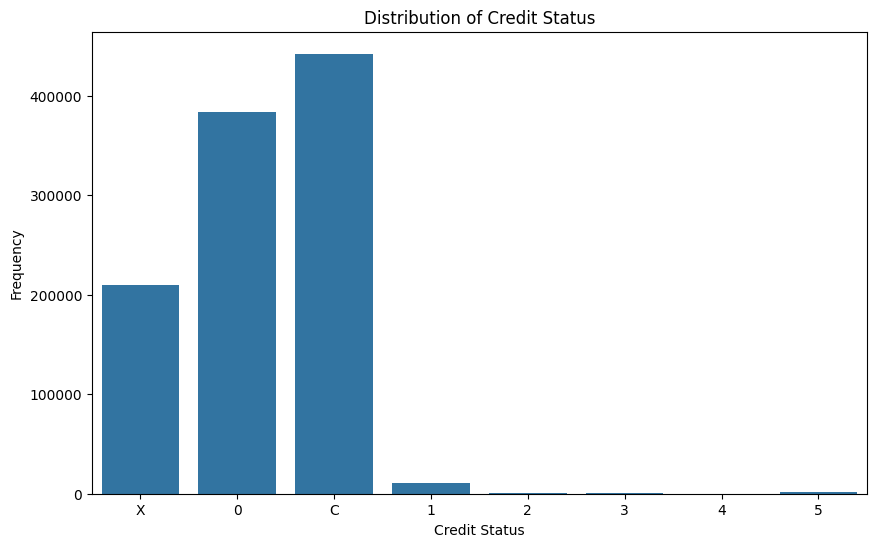


Analysis of MONTHS_BALANCE:
Min Months Balance: -60
Max Months Balance: 0


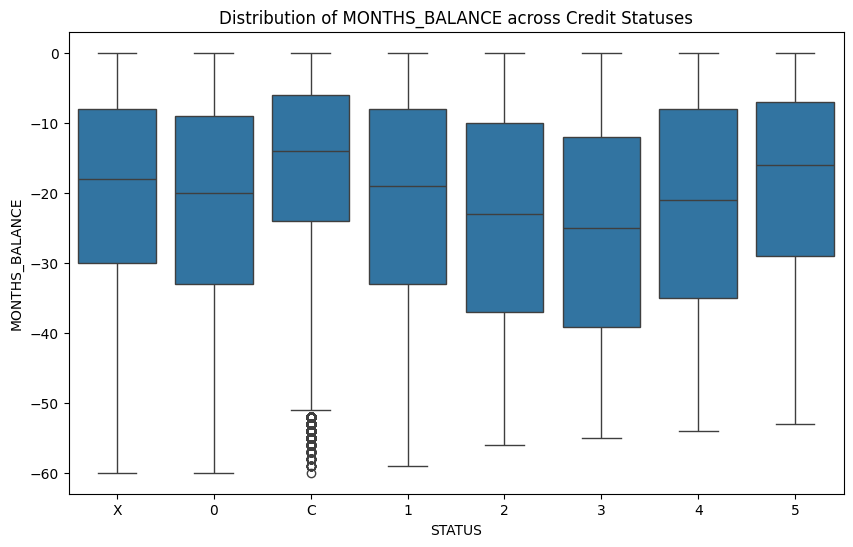

In [ ]:
# credit_df Exploration
print("\ncredit_df Information:")
display(credit_df.info())
print("\ncredit_df Missing Values:")
display(credit_df.isnull().sum())
print("\ncredit_df Shape:", credit_df.shape)
print("\ncredit_df Descriptive Statistics:")
display(credit_df.describe(include='all'))

print("\nDistribution of Credit Status (STATUS):")
plt.figure(figsize=(10, 6))
sns.countplot(x='STATUS', data=credit_df)
plt.title('Distribution of Credit Status')
plt.xlabel('Credit Status')
plt.ylabel('Frequency')
plt.show()

print("\nAnalysis of MONTHS_BALANCE:")
print("Min Months Balance:", credit_df['MONTHS_BALANCE'].min())
print("Max Months Balance:", credit_df['MONTHS_BALANCE'].max())
plt.figure(figsize=(10, 6))
sns.boxplot(x='STATUS', y='MONTHS_BALANCE', data=credit_df)
plt.title('Distribution of MONTHS_BALANCE across Credit Statuses')
plt.show()

# Data Preparation

In [ ]:
# Merge Datasets
merged_df = pd.merge(app_df, credit_df, on='ID', how='inner')

In [ ]:
# Create Target Variable
merged_df['target'] = merged_df['STATUS'].apply(lambda x: 1 if x in ['1','2','3','4','5'] else 0)
merged_df = merged_df.drop('STATUS', axis=1)

In [ ]:
# Feature Engineering: Credit History Length
merged_df['credit_history_length'] = abs(merged_df['MONTHS_BALANCE'])

In [ ]:
display(merged_df.head())

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,age,MONTHS_BALANCE,target,credit_history_length
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,NaN,2.0,32.890411,0,0,0
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,NaN,2.0,32.890411,-1,0,1
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,NaN,2.0,32.890411,-2,0,2
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,NaN,2.0,32.890411,-3,0,3
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,NaN,2.0,32.890411,-4,0,4


In [ ]:
# Feature Engineering: Credit History Length
merged_df['credit_history_length'] = abs(merged_df['MONTHS_BALANCE'])

In [ ]:
display(merged_df.head())

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,age,MONTHS_BALANCE,target,credit_history_length
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,NaN,2.0,32.890411,0,0,0
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,NaN,2.0,32.890411,-1,0,1
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,NaN,2.0,32.890411,-2,0,2
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,NaN,2.0,32.890411,-3,0,3
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,NaN,2.0,32.890411,-4,0,4


In [ ]:
# Handle Missing Values
merged_df['OCCUPATION_TYPE'].fillna(merged_df['OCCUPATION_TYPE'].mode()[0], inplace=True)

<ipython-input-18-18def17bb4ad>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['OCCUPATION_TYPE'].fillna(merged_df['OCCUPATION_TYPE'].mode()[0], inplace=True)


In [ ]:
# Outlier Handling (capping)
merged_df['age'] = np.clip(merged_df['age'], merged_df['age'].quantile(0.01), merged_df['age'].quantile(0.99))
merged_df['CNT_CHILDREN'] = np.clip(merged_df['CNT_CHILDREN'], merged_df['CNT_CHILDREN'].quantile(0.01), merged_df['CNT_CHILDREN'].quantile(0.99))

In [ ]:
# Feature Encoding
categorical_cols = ['NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_features = encoder.fit_transform(merged_df[categorical_cols])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_cols))
merged_df = pd.concat([merged_df, encoded_df], axis=1)

In [ ]:
# Feature Scaling
numerical_cols = ['AMT_INCOME_TOTAL', 'age', 'DAYS_EMPLOYED', 'CNT_FAM_MEMBERS', 'CNT_CHILDREN', 'credit_history_length']
scaler = StandardScaler()
scaled_features = scaler.fit_transform(merged_df[numerical_cols])
scaled_df = pd.DataFrame(scaled_features, columns=numerical_cols)
merged_df[numerical_cols] = scaled_df

In [ ]:
# Drop Unnecessary Columns
df_processed = merged_df.drop(['ID', 'DAYS_BIRTH', 'MONTHS_BALANCE'], axis=1)
df_processed = df_processed.drop(categorical_cols, axis = 1)

In [ ]:
display(df_processed.head())

,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,age,target,...,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,CODE_GENDER_F,CODE_GENDER_M,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y
0,-0.593135,2.351502,-0.456636,1,1,0,0,-0.230155,-1.00721,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,-0.593135,2.351502,-0.456636,1,1,0,0,-0.230155,-1.00721,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,-0.593135,2.351502,-0.456636,1,1,0,0,-0.230155,-1.00721,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,-0.593135,2.351502,-0.456636,1,1,0,0,-0.230155,-1.00721,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,-0.593135,2.351502,-0.456636,1,1,0,0,-0.230155,-1.00721,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [ ]:
# Split data into training and temporary set (validation + testing)
X = df_processed.drop('target', axis=1)
y = df_processed['target']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
# Split temporary set into validation and testing sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(544400, 55) (544400,)
(116657, 55) (116657,)
(116658, 55) (116658,)


# Modeling

In [ ]:
# Define the model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
17013/17013 ━━━━━━━━━━━━━━━━━━━━ 51s 3ms/step - accuracy: 0.9847 - loss: 0.0811 - val_accuracy: 0.9851 - val_loss: 0.0740
Epoch 2/10
17013/17013 ━━━━━━━━━━━━━━━━━━━━ 85s 3ms/step - accuracy: 0.9851 - loss: 0.0731 - val_accuracy: 0.9852 - val_loss: 0.0720
Epoch 3/10
17013/17013 ━━━━━━━━━━━━━━━━━━━━ 80s 3ms/step - accuracy: 0.9852 - loss: 0.0706 - val_accuracy: 0.9851 - val_loss: 0.0701
Epoch 4/10
17013/17013 ━━━━━━━━━━━━━━━━━━━━ 81s 3ms/step - accuracy: 0.9852 - loss: 0.0691 - val_accuracy: 0.9852 - val_loss: 0.0704
Epoch 5/10
17013/17013 ━━━━━━━━━━━━━━━━━━━━ 85s 3ms/step - accuracy: 0.9851 - loss: 0.0688 - val_accuracy: 0.9846 - val_loss: 0.0715
Epoch 6/10
17013/17013 ━━━━━━━━━━━━━━━━━━━━ 50s 3ms/step - accuracy: 0.9852 - loss: 0.0668 - val_accuracy: 0.9851 - val_loss: 0.0681
Epoch 7/10
17013/17013 ━━━━━━━━━━━━━━━━━━━━ 83s 3ms/step - accuracy: 0.9853 - loss: 0.0659 - val_accuracy: 0.9852 - val_loss: 0.0672
Epoch 8/10
17013/17013 ━━━━━━━━━━━━━━━━━━━━ 49s 3ms/step - accuracy: 

In [ ]:
# Adjust hyperparameters manually
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))  # Increased units
model.add(Dense(64, activation='relu'))  # Increased units
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model with a different learning rate
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])  # Adjusted learning rate

In [ ]:
# Train the model again
history = model.fit(X_train, y_train, epochs=15, batch_size=64, validation_data=(X_val, y_val))  # Adjusted epochs and batch size

Epoch 1/15
8507/8507 ━━━━━━━━━━━━━━━━━━━━ 32s 4ms/step - accuracy: 0.9753 - loss: 0.1109 - val_accuracy: 0.9851 - val_loss: 0.0761
Epoch 2/15
8507/8507 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - accuracy: 0.9850 - loss: 0.0761 - val_accuracy: 0.9851 - val_loss: 0.0752
Epoch 3/15
8507/8507 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - accuracy: 0.9852 - loss: 0.0740 - val_accuracy: 0.9851 - val_loss: 0.0743
Epoch 4/15
8507/8507 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - accuracy: 0.9851 - loss: 0.0735 - val_accuracy: 0.9851 - val_loss: 0.0732
Epoch 5/15
8507/8507 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - accuracy: 0.9850 - loss: 0.0726 - val_accuracy: 0.9851 - val_loss: 0.0728
Epoch 6/15
8507/8507 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - accuracy: 0.9851 - loss: 0.0711 - val_accuracy: 0.9852 - val_loss: 0.0715
Epoch 7/15
8507/8507 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - accuracy: 0.9856 - loss: 0.0687 - val_accuracy: 0.9852 - val_loss: 0.0709
Epoch 8/15
8507/8507 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - accuracy: 0.9852 - loss: 0

# Evaluation

In [ ]:
# Predict on the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

3646/3646 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
Accuracy: 0.9853
Precision: 0.8095
Recall: 0.0196
F1-score: 0.0382


# Deployment

## Model Simulation

In [ ]:
# Assume 'new_data' is a DataFrame containing features for a new applicant
# Make sure 'new_data' has the same columns as X_train and is preprocessed similarly
# For demonstration, let's use the first row of X_test as 'new_data'
new_data = X_test.iloc[[0]]

# Make prediction
prediction = (model.predict(new_data) > 0.5).astype("int32")[0][0]

# Interpret the prediction
if prediction == 1:
    print("The model predicts this applicant is a 'bad' client (high risk).")
else:
    print("The model predicts this applicant is a 'good' client (low risk).")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
The model predicts this applicant is a 'good' client (low risk).


## Save Model

In [ ]:
# Save the model using the SavedModel format
model.save('credit_risk_model.keras') # Add the .keras extension to the filename